### Convolutional Neural Network - Pretrained Convolutional Base

Some research teams have trained convolutional neural networks on much larger datasets. We have seen during the lecture that the networks can model conceptual patterns as they go through the layers. This was identified by Le Cun in his first experiments (http://yann.lecun.com/exdb/lenet/). In this last part, you will train classifiers on top of a pretrained convolutional base.
1. Build a network that consists of the Inception V3 convolutional base and two dense layers. As in Chollet, Listing 5.17, you will program an  function.

    `extract_features()`

2. Train your network and report the training and validation losses and accuracies.
3. Apply your network to the test set and report the accuracy as well as the confusion matrix you obtained.
4. Modify your program to include an image transformer. Train a new model.
5. Apply your network to the test set and report the accuracy as well as the confusion matrix you obtained.

#### Scale Images

In [5]:
from keras.applications import InceptionV3
conv_base = InceptionV3(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

In [6]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
"""
train_datagen = ImageDataGenerator(
rescale=1. / 255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
"""
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

TRAIN_DIR = 'flowers_split/train'
VAL_DIR = 'flowers_split/validation'
TEST_DIR = 'flowers_split/test'

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 3, 3, 2048))
    labels = np.zeros(shape=(sample_count,5))
    generator = datagen.flow_from_directory(
        directory, 
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode = 'categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(TRAIN_DIR, 2654)
validation_features, validation_labels = extract_features(VAL_DIR, 865)
test_features, test_labels = extract_features(TEST_DIR, 865)

train_features = np.reshape(train_features, (2654, 3*3* 2048))
validation_features = np.reshape(validation_features, (865, 3*3* 2048))
test_features = np.reshape(test_features, (865, 3*3* 2048))

"""
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory( 
    VAL_DIR,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory( 
    TEST_DIR,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')
    """


Found 2654 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


"\ntrain_generator = train_datagen.flow_from_directory(\n    TRAIN_DIR,\n    target_size=(150, 150),\n    batch_size=batch_size,\n    class_mode='categorical')\n\nvalidation_generator = test_datagen.flow_from_directory( \n    VAL_DIR,\n    target_size=(150, 150),\n    batch_size=batch_size,\n    class_mode='categorical')\n\ntest_generator = test_datagen.flow_from_directory( \n    TEST_DIR,\n    target_size=(150, 150),\n    batch_size=batch_size,\n    class_mode='categorical')\n    "

In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
for data_batch, labels_batch in test_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
for data_batch, labels_batch in validation_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

NameError: name 'train_generator' is not defined

#### Build Model

In [8]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=3* 3 * 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

"""
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
#model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Dense(5, activation='softmax'))
"""

"\nmodel = models.Sequential() \nmodel.add(layers.Conv2D(32, (3, 3), activation='relu',\ninput_shape=(150, 150, 3))) \nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(64, (3, 3), activation='relu')) \nmodel.add(layers.MaxPooling2D((2, 2))) \nmodel.add(layers.Conv2D(128, (3, 3), activation='relu')) \nmodel.add(layers.MaxPooling2D((2, 2))) \nmodel.add(layers.Conv2D(128, (3, 3), activation='relu')) \nmodel.add(layers.MaxPooling2D((2, 2))) \nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(512, activation='relu')) \n#model.add(layers.Dense(1, activation='sigmoid'))\nmodel.add(layers.Dense(5, activation='softmax'))\n"

#### Compile

In [9]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#### Fit the model

In [10]:
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

"""history = model.fit_generator( train_generator,
      steps_per_epoch=2654//batch_size,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=865//batch_size)"""

Train on 2654 samples, validate on 865 samples
Epoch 1/30
2654/2654 [==============================] - 7s 2ms/step - loss: 1.3088 - acc: 0.6112 - val_loss: 0.7568 - val_acc: 0.7237
Epoch 2/30
2654/2654 [==============================] - 7s 2ms/step - loss: 0.7546 - acc: 0.7558 - val_loss: 0.7599 - val_acc: 0.7549
Epoch 3/30
2654/2654 [==============================] - 6s 2ms/step - loss: 0.5762 - acc: 0.8161 - val_loss: 0.6101 - val_acc: 0.7965
Epoch 4/30
2654/2654 [==============================] - 7s 3ms/step - loss: 0.4865 - acc: 0.8440 - val_loss: 0.6213 - val_acc: 0.8058
Epoch 5/30
2654/2654 [==============================] - 6s 2ms/step - loss: 0.4181 - acc: 0.8700 - val_loss: 0.8333 - val_acc: 0.7965
Epoch 6/30
2654/2654 [==============================] - 6s 2ms/step - loss: 0.3303 - acc: 0.8930 - val_loss: 0.9182 - val_acc: 0.7538
Epoch 7/30
2654/2654 [==============================] - 6s 2ms/step - loss: 0.2845 - acc: 0.9182 - val_loss: 0.7804 - val_acc: 0.8220
Epoch 8/30
2654

'history = model.fit_generator( train_generator,\n      steps_per_epoch=2654//batch_size,\n      epochs=50,\n      validation_data=validation_generator,\n      validation_steps=865//batch_size)'

#### Save the model

In [28]:
model.save('flower_picker_x2000_30.h5')

#### Display Loss and Acc

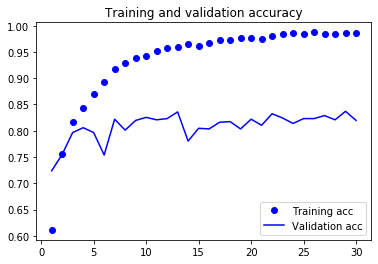

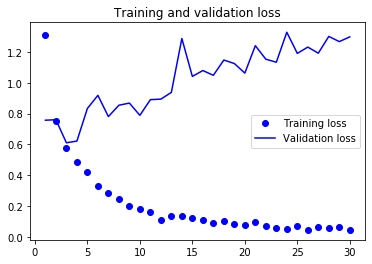

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) 
# print('test acc:', test_acc)
# print('test loss:', test_loss)

score, acc = model.evaluate(test_features, test_labels,
                            batch_size=b20)
print('Test score:', score)
print('Test accuracy:', acc)

Y_pred = model.predict(test_features)
y_pred = np.argmax(Y_pred, axis=1)
true_class = np.argmax(test_labels, 1)
print('Confusion Matrix')
print(confusion_matrix(true_class, y_pred))
print('Classification Report')
target_names = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']
print(classification_report(true_class, y_pred, target_names=target_names))

Confusion Matrix
[[158   6   2   2   7]
 [ 13 182   2   2   4]
 [  2   3 129   5  19]
 [  5  10   5 117   3]
 [  1   7  10   6 165]]
Classification Report
              precision    recall  f1-score   support

       Daisy       0.88      0.90      0.89       175
   Dandelion       0.88      0.90      0.89       203
        Rose       0.87      0.82      0.84       158
   Sunflower       0.89      0.84      0.86       140
       Tulip       0.83      0.87      0.85       189

    accuracy                           0.87       865
   macro avg       0.87      0.86      0.87       865
weighted avg       0.87      0.87      0.87       865

